# K Means Clustering with Sklearn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('3.01. Country clusters.csv')

In [3]:
# the Latitude and Longitude correspond to the geographic centers of the countries

data

Country  Latitude  Longitude Language
0        USA     44.97    -103.77  English
1     Canada     62.40     -96.80  English
2     France     46.75       2.40   French
3         UK     54.01      -2.53  English
4    Germany     51.15      10.40   German
5  Australia    -25.45     133.11  English

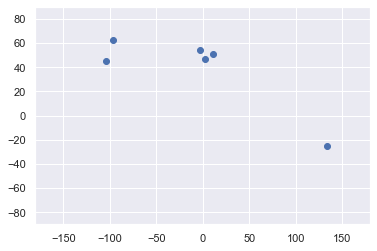

In [4]:
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [5]:
# first is rows, the second is columns 

x = data.iloc[:,1:3]

In [6]:
x

Latitude  Longitude
0     44.97    -103.77
1     62.40     -96.80
2     46.75       2.40
3     54.01      -2.53
4     51.15      10.40
5    -25.45     133.11

In [7]:
# 2 is the number of the clusters want to produce

kmeans = KMeans(2)

In [8]:
# it will apply kmeans clustering with 2 clusters to x

kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [9]:
# the result an array containing the predicted clusters

identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 0, 0, 0, 1], dtype=int32)

In [10]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

Country  Latitude  Longitude Language  Cluster
0        USA     44.97    -103.77  English        0
1     Canada     62.40     -96.80  English        0
2     France     46.75       2.40   French        0
3         UK     54.01      -2.53  English        0
4    Germany     51.15      10.40   German        0
5  Australia    -25.45     133.11  English        1

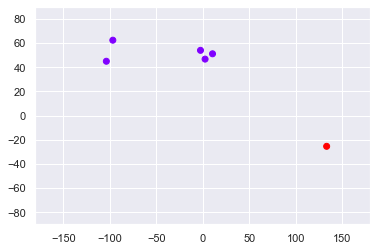

In [11]:
# it is the same graph as before

plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c = data_with_clusters['Cluster'], cmap = 'rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

#### Clustering Categorical Data

In [12]:
data_mapped = data.copy()
data_mapped['Language'] = data_mapped['Language'].map({'English':0, 'French':1, 'German':2})
data_mapped

Country  Latitude  Longitude  Language
0        USA     44.97    -103.77         0
1     Canada     62.40     -96.80         0
2     France     46.75       2.40         1
3         UK     54.01      -2.53         0
4    Germany     51.15      10.40         2
5  Australia    -25.45     133.11         0

In [13]:
x = data_mapped.iloc[:,3:4]

In [14]:
x

Language
0         0
1         0
2         1
3         0
4         2
5         0

In [15]:
kmeans = KMeans(3)

In [16]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 2, 0, 1, 0], dtype=int32)

In [18]:
data_with_clusters = data_mapped.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

Country  Latitude  Longitude  Language  Cluster
0        USA     44.97    -103.77         0        0
1     Canada     62.40     -96.80         0        0
2     France     46.75       2.40         1        2
3         UK     54.01      -2.53         0        0
4    Germany     51.15      10.40         2        1
5  Australia    -25.45     133.11         0        0

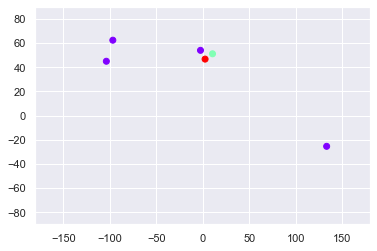

In [19]:
# the plot is unequivocal the 3 clusters

plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c = data_with_clusters['Cluster'], cmap = 'rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

#### Clustering Categorical and Numerical Data

In [20]:
data_mapped = data.copy()
data_mapped['Language'] = data_mapped['Language'].map({'English':0, 'French':1, 'German':2})
data_mapped

Country  Latitude  Longitude  Language
0        USA     44.97    -103.77         0
1     Canada     62.40     -96.80         0
2     France     46.75       2.40         1
3         UK     54.01      -2.53         0
4    Germany     51.15      10.40         2
5  Australia    -25.45     133.11         0

In [21]:
x = data_mapped.iloc[:,1:4]

In [22]:
x

Latitude  Longitude  Language
0     44.97    -103.77         0
1     62.40     -96.80         0
2     46.75       2.40         1
3     54.01      -2.53         0
4     51.15      10.40         2
5    -25.45     133.11         0

In [23]:
kmeans = KMeans(2)

In [24]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [25]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 0, 0, 0, 1], dtype=int32)

In [26]:
data_with_clusters = data_mapped.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

Country  Latitude  Longitude  Language  Cluster
0        USA     44.97    -103.77         0        0
1     Canada     62.40     -96.80         0        0
2     France     46.75       2.40         1        0
3         UK     54.01      -2.53         0        0
4    Germany     51.15      10.40         2        0
5  Australia    -25.45     133.11         0        1

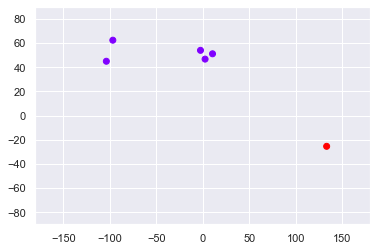

In [27]:
# this time the 3 clusters are based on simply on geographical location
# instead of language

plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c = data_with_clusters['Cluster'], cmap = 'rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

#### Selecting the number of clusters
___

The most adopted criterion is the Elbot method, the clustering was about minimizing the distance between points in a cluster and maximizing the distance between clusters.

It turns out that K-Means, these two occur simultaneously if we minimize the distance between points in a cluster, we automatically maximizing the distance between clusters.

The distance is measured in sum of squared, the academic term is within-cluster sum of squares, or WCSS.

Similar to SST, SSR and SSE, WCSS is a measure  developed within the ANOVA framework, if we minimize the WCSS, we have reached the perfect clustering solution.

If have 6 observation, the clusters is 6, then the WCSS is 0, that because there is just one point in each cluster and we can't have it within WCSS, furthermore the clusters are as far as they can possibly be.

We don't really want WCSS has to be minimized, instead we want it to be as low as possible while we can still have a small number clusters.

If we plot WCSS as against the number of clusters, we get the graph it looks like an elbow, the point is that the WCSS is a monotonously decreasing function which is lower for a bigger number of clusters.

In this graph, in the beginning WCSS is declining extremely fast at some point it reaches the elbow, afterwards we are not reaching a much better solution in terms of WCSS by increasing the number of the clusters.

In [28]:
# it need to solve the problem with 1,2,3,4,5,6 clusters and calculate WCSS
 
kmeans.inertia_

13208.95812

In [29]:
# range 1 to 7 because it have total of 6 observations

wcss = []

for i in range(1,7):
    
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [30]:
# the 42605 is 1 cluster
# the 13208 is 2 cluster
# the 290 is 3 cluster
# the 113 is 4 cluster
# the 39 is 5 cluster
# the 0 is 6 cluster, this means each point is a separate cluster
# the sequence is decreasing with very big leaps in the first two steps and much smaller one later on

wcss

[42605.41356666667,
 13208.95812,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

Text(0, 0.5, 'Within-cluster Sum of Squares')

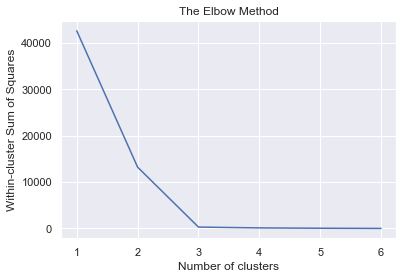

In [31]:
# the 3 clusters is definitely the better one
# the 2 clusters would be suboptimal as the leap from 2 to 3 is very big in terms of wcss

number_cluster = range(1,7)

plt.plot(number_cluster, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')